In [1]:
import warnings

import bionty as bt
import lamindb as ln
import spatialdata as sd
import spatialdata_plot
import pandas as pd

warnings.filterwarnings("ignore")

→ connected lamindb: scverse/spatialdata-db


/lustre/groups/ml01/workspace/lea.zimmermann/software/miniconda3/envs/sddb_test/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


# Query and search features that are not associated to an ontology

Similar to the ontology features, we can use lookups to get an overview of which custom feature values are present in the database. The two most helpful functions to search for specific features values are `df()` and `lookup()`.

For an overview of the current metadata schema, see the `intro.ipynb`.

**Known issues:** There is currently one **one** registry to store all available custom labels (= ULabel registry) and therefore, the lookup function works on a union of all custom features (Chemistry Version **and** Modality **and** Software ...). This makes searching for spefic values harder and will be corrected as a next step in March/April.


In [4]:
# get an overview of all stored feature values
ln.ULabel.df().head(5)

,uid,name,is_type,description,reference,reference_type,space_id,type_id,run_id,created_at,created_by_id,_aux,_branch_code
id,,,,,,,,,,,,,
345,KPrmuIPt,"Sagittal-Anterior, Section 1",None,None,None,None,1,None,291,2025-03-12 08:52:52.004537+00:00,8,None,1
344,cjFgpOzz,https://www.10xgenomics.com/datasets/mouse-bra...,None,None,None,None,1,None,291,2025-03-12 08:52:51.858038+00:00,8,None,1
343,VaKW5vA3,"Sagittal-Posterior, Section 1",None,None,None,None,1,None,291,2025-03-12 08:51:49.039514+00:00,8,None,1
342,zLlTEZuQ,https://www.10xgenomics.com/datasets/mouse-bra...,None,None,None,None,1,None,291,2025-03-12 08:51:48.893475+00:00,8,None,1
341,kDG5AhkA,"Sagittal-Anterior, Section 2",None,None,None,None,1,None,291,2025-03-12 08:50:46.669085+00:00,8,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,UNeZo3sT,"Non-Diseased, Pre-Designed Panel",None,None,None,None,1,None,291,2025-03-12 06:32:08.588188+00:00,8,None,1
249,wGG0t7rP,Xenium Human Skin Gene Expression Panel with C...,None,None,None,None,1,None,291,2025-03-12 06:26:46.398384+00:00,8,None,1
248,k1t8AVbs,Xenium Human Skin Gene Expression Panel,None,None,None,None,1,None,291,2025-03-12 06:25:30.643958+00:00,8,None,1


Using the `lookup` function, we can use autocorrection to quickly find values (just typing `ulabels.`):

In [5]:
ulabels = ln.ULabel.lookup()

In [19]:
ulabels.ffpe

ULabel(uid='QR4qUYMz', name='FFPE', created_by_id=8, run_id=279, space_id=1, created_at=2025-03-10 14:48:13 UTC)

And then use these values to filter Artifacts in exactly the same way as using the ontology registries:

In [18]:
query_fixed_frozen = ln.Artifact.filter(ulabels=ulabels.ffpe)
query_fixed_frozen.df(include=['otype'], features=True).head(5)

,uid,key,description,Development Stage,Assay,Disease,Tissue,Organism,Preservation Method,otype
id,,,,,,,,,,
452,MzclPwnrI15tt02j0000,None,"Human Tonsil H&E, 6.5 mm (FFPE) (nan)",{unknown},{Visium Spatial Gene Expression},NaN,{tonsil},{human},{FFPE},spatialdata
496,dTyY0k852AkN4zGC0000,None,Human Prostate Cancer (nan),{unknown},{Visium Spatial Gene Expression},{Adenocarcinoma},{prostate},{human},{FFPE},spatialdata
455,0DBMyHBE9J7SqsIk0000,None,Visium Mouse (Brain Replicate 2),{adult stage},{Visium Spatial Gene Expression},{healthy},{brain},{mouse},{FFPE},spatialdata
437,sifvOUS5rtRnNTBj0000,None,Human (Lymph Node),{adult stage},{10x Xenium},{healthy},{lymph node},{human},{FFPE},spatialdata
449,9AqEDuJPhWpSe9PZ0000,None,Xenium Human Lung Data (Lung Cancer),{adult stage},{10x Xenium},{lung cancer},{lung},{human},{FFPE},spatialdata


Alternatively, we can use standard string operations to filter feature values e.g. that all values that contains the string `Panel`:

In [29]:
ln.ULabel.filter(name__contains="Panel").df(include=['name'])

,uid,name,is_type,name
id,,,,
242,9aVmcl4y,Panel,None,Panel
244,79SSTJVk,Mouse Bone Data with Custom Add-on Panel,None,Mouse Bone Data with Custom Add-on Panel
245,bYhyUs38,Human Bone and Bone Marrow Data with Custom Ad...,None,Human Bone and Bone Marrow Data with Custom Ad...
246,tLeiiAuu,Xenium Human Multi-Tissue and Cancer Panel,None,Xenium Human Multi-Tissue and Cancer Panel
247,vTuIrZXe,Xenium Human CMulti-Tissue and Cancer Panel,None,Xenium Human CMulti-Tissue and Cancer Panel
248,k1t8AVbs,Xenium Human Skin Gene Expression Panel,None,Xenium Human Skin Gene Expression Panel
249,wGG0t7rP,Xenium Human Skin Gene Expression Panel with C...,None,Xenium Human Skin Gene Expression Panel with C...
250,UNeZo3sT,"Non-Diseased, Pre-Designed Panel",None,"Non-Diseased, Pre-Designed Panel"
251,JtMegtnf,Xenium Human Colon Gene Expression Panel,None,Xenium Human Colon Gene Expression Panel


Then we can use the `lookup` to search for all datasets that contain a certain gene panel:

In [30]:
query_gene_panel = ln.Artifact.filter(ulabels=ulabels.mouse_bone_data_with_custom_add_on_panel)
query_gene_panel.df(include=['otype'], features=True).head(5)

,uid,key,description,Development Stage,Assay,Disease,Tissue,Organism,Panel,otype
id,,,,,,,,,,
417,mGqMkKVAWzJ25Wrl0000,None,Xenium Mouse Bone Data (0.5M EDTA decalcificat...,{adult stage},{10x Xenium},{unknown},{bone},{mouse},{Mouse Bone Data with Custom Add-on Panel},spatialdata
418,OI0DQbFQXm46Rx4q0000,None,Xenium Mouse Bone Data (15% EDTA/0.4% PFA deca...,{adult stage},{10x Xenium},{unknown},{bone},{mouse},{Mouse Bone Data with Custom Add-on Panel},spatialdata
416,yuaza16PugyKoBIr0000,None,Xenium Mouse Bone Data (10% Formic acid decalc...,{adult stage},{10x Xenium},{unknown},{bone},{mouse},{Mouse Bone Data with Custom Add-on Panel},spatialdata


In [ ]:
artifact = query_gene_panel.first()

In [32]:
target_path = './dataset_mouse_bone_panel.zarr'
artifact.path.download_to(target_path)

In [33]:
sdata = sd.read_zarr(
    target_path
)
sdata

SpatialData object, with associated Zarr store: /ictstr01/home/icb/lea.zimmermann/projects/spatialdata-db/spatialdata-db/docs/notebooks/dataset_mouse_bone_panel.zarr
├── Images
│     ├── 'morphology_focus': DataTree[cyx] (1, 50965, 53975), (1, 25482, 26987), (1, 12741, 13493), (1, 6370, 6746), (1, 3185, 3373)
│     └── 'morphology_mip': DataTree[cyx] (1, 50965, 53975), (1, 25482, 26987), (1, 12741, 13493), (1, 6370, 6746), (1, 3185, 3373)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (50965, 53975), (25482, 26987), (12741, 13493), (6370, 6746), (3185, 3373)
│     └── 'nucleus_labels': DataTree[yx] (50965, 53975), (25482, 26987), (12741, 13493), (6370, 6746), (3185, 3373)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 10) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (348141, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (348141, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (348141, 1) (2D shapes)
└

INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   


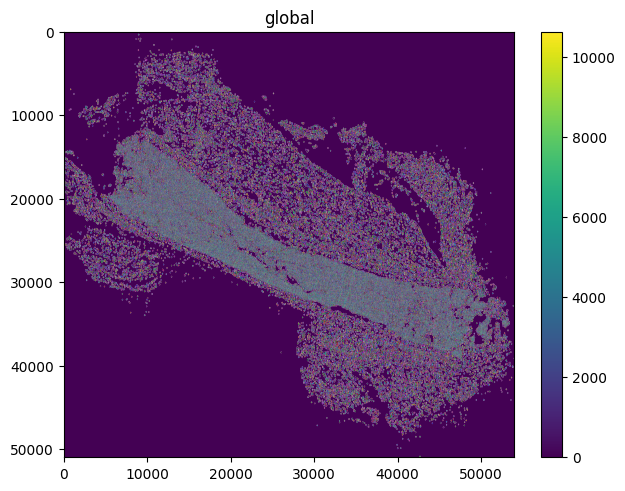

In [35]:
(
    sdata
    .pl.render_images(elements="morphology_focus")
    .pl.render_labels(elements="cell_labels")
    .pl.show("global")
)